# Software Coaching for Python
# Week 1: Web Scraping - Exercises

Instructor: Kang-Pyo Lee

In [1]:
! pip install --user --upgrade requests bs4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 975.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=fb4eeb2c511198d2e1455f318f96242fb3748503bcc629a41df745ed96d5a1ba
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.31.0 which is incompatible.


1\. Import the <b>requests</b> package and the <b>BeautifulSoup</b> module from the <b>bs4</b> package . You are going to extract information from one of the webpages on un.org: https://news.un.org/en/story/2021/02/1085812. Save the URL of the webpage in the `url` variable. Fetch the HTML content from the webpage and save it in the `r` variable. Then, create a BeautifulSoup object named `soup` to parse the HTML content in `r`.

In [2]:
# Your answer here
import requests
from bs4 import BeautifulSoup

url = "https://news.un.org/en/story/2021/02/1085812"
r = requests.get(url)
soup = BeautifulSoup(r.content, "html.parser")
soup

<!DOCTYPE html>

<html dir="ltr" lang="en" prefix="og: https://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script>window.dataLayer = window.dataLayer || []; window.dataLayer.push({"drupalLanguage":"en","drupalCountry":"US","siteName":"UN News","entityCreated":"1614346505","entityLangcode":"en","entityType":"node","entityBundle":"news_story","entityId":"1085812","entityTitle":"UN climate report a ‘red alert’ for the planet: Guterres ","news_date":"2021-02-26","focus_page":"","region":"Global","tags":"climate action","topic":"Climate and Environment","added_topics":"","campaign_id":"UNFCCC","userUid":0});</script>
<link href="https://news.un.org/en/story/2021/02/1085812" rel="canonical"/>
<link href="https://news.un.org/en/node/1085812" rel="shortlink"/>
<meta content="UN News, Global perspectives, Human Stories" name="news_keywords"/>
<link href="https://global.unitednations.entermediadb.net/assets/mediadb/services/module/asset/downloads/preset/Libraries/Production+Library/16-01-2020-Z

2\. Get the title text of the webpage '*UN climate report a ‘red alert’ for the planet: Guterres | | UN News*'. Do not confuse with the title of the article. Note that you must get only the title text, not the title element.

In [3]:
# Your answer here
soup.title.text

'UN climate report a ‘red alert’ for the planet: Guterres | UN News'

3\. Get the title text of the article '<i>UN climate report a ‘red alert’ for the planet: Guterres </i>'. Strip out any unnecessary whitespaces at the end using the rstrip method.

In [4]:
# Your answer here
soup.title.text.rstrip()

'UN climate report a ‘red alert’ for the planet: Guterres | UN News'

4\. Now, you want to find the img element defining the large featured image right below the article title. Based on the fact that an image is defined in an img element, you now want to simply find the img element using the find method not setting the attrs parameter. Try that now and learn it is not the img element you are looking for.

In [5]:
# Your answer here
from IPython.display import Image

img_url = soup.find('img')['src']
img_url
Image(url=img_url)

5\. This indicates that there are more than one img elements . Now that you are aware of it, you would better find its parent/ancestor element that contains the img element you are searching for. The picture element should be the best for that. Find the picture element.

In [6]:
# Your answer here
soup.find("picture")

<picture>
<source media="(max-width: 413px)" srcset="https://global.unitednations.entermediadb.net/assets/mediadb/services/module/asset/downloads/preset/Libraries/Production+Library/16-01-2020-ZIM_20191203_WFP-Matteo_Cosorich_9596.jpg/image350x235cropped.jpg"/>
<source media="(max-width: 767px)" srcset="https://global.unitednations.entermediadb.net/assets/mediadb/services/module/asset/downloads/preset/Libraries/Production+Library/16-01-2020-ZIM_20191203_WFP-Matteo_Cosorich_9596.jpg/image560x340cropped.jpg"/>
<source media="(max-width: 991px)" srcset="https://global.unitednations.entermediadb.net/assets/mediadb/services/module/asset/downloads/preset/Libraries/Production+Library/16-01-2020-ZIM_20191203_WFP-Matteo_Cosorich_9596.jpg/image770x420cropped.jpg"/>
<source media="(max-width: 1199px)" srcset="https://global.unitednations.entermediadb.net/assets/mediadb/services/module/asset/downloads/preset/Libraries/Production+Library/16-01-2020-ZIM_20191203_WFP-Matteo_Cosorich_9596.jpg/image117

6\. Examining the HTML code inside the picture element above, you should see there is only one img element in it, which is exactly what you have been looking for. Find the img element.

In [7]:
# Your answer here
soup.find("picture").find('img')

<img alt="Global temperature rise could lead to more frequent and more intense extreme weather events, such as prolonged droughts or devastating floods. " height="530" loading="lazy" src="https://global.unitednations.entermediadb.net/assets/mediadb/services/module/asset/downloads/preset/Libraries/Production+Library/16-01-2020-ZIM_20191203_WFP-Matteo_Cosorich_9596.jpg/image1170x530cropped.jpg" title="Global temperature rise could lead to more frequent and more intense extreme weather events, such as prolonged droughts or devastating floods. " width="1170">
</img>

*** Note: you may want to find it by searching for all img elements and then simply taking the second element, which should work at least for this page. This approach, however, is not recommended because, when you want to apply the same code to other pages, there is no guarantee that the target image is always the second image in the page. Finding an element using its hierarchy is preferred over that using its relative position.

In [8]:
soup.find_all("img")

[<img alt="Home" src="/themes/custom/un_base_theme/images/logos/logo-en.svg"/>,
 <img alt="Global temperature rise could lead to more frequent and more intense extreme weather events, such as prolonged droughts or devastating floods. " height="530" loading="lazy" src="https://global.unitednations.entermediadb.net/assets/mediadb/services/module/asset/downloads/preset/Libraries/Production+Library/16-01-2020-ZIM_20191203_WFP-Matteo_Cosorich_9596.jpg/image1170x530cropped.jpg" title="Global temperature rise could lead to more frequent and more intense extreme weather events, such as prolonged droughts or devastating floods. " width="1170">
 </img>,
 <img alt="..." src="https://unitednations.entermediadb.net/assets/mediadb/services/module/asset/downloads/preset/Libraries/Graphics+Library/06-06-2023_ENG_UN+News_Survey.png.png/image100x100cropped.jpg"/>,
 <img alt="A woman carries seafood on the shore in Senegal, one of the few countries to develop a national climate change adaptation plan spe

In [9]:
soup.find_all("img")[1]

<img alt="Global temperature rise could lead to more frequent and more intense extreme weather events, such as prolonged droughts or devastating floods. " height="530" loading="lazy" src="https://global.unitednations.entermediadb.net/assets/mediadb/services/module/asset/downloads/preset/Libraries/Production+Library/16-01-2020-ZIM_20191203_WFP-Matteo_Cosorich_9596.jpg/image1170x530cropped.jpg" title="Global temperature rise could lead to more frequent and more intense extreme weather events, such as prolonged droughts or devastating floods. " width="1170">
</img>

7\. Extract the URL of the image and save it in the `img_url` variable.

In [10]:
# Your answer here
img_url = soup.find("picture").find("img")['src']

In [11]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
print(img_url)

https://global.unitednations.entermediadb.net/assets/mediadb/services/module/asset/downloads/preset/Libraries/Production+Library/16-01-2020-ZIM_20191203_WFP-Matteo_Cosorich_9596.jpg/image1170x530cropped.jpg


8\. Using a regular expression, extract, from `img_url`, the image file name that is located after the last slash ('/') in the URL and ends with '*.jpg*'.

In [12]:
import re

# Your answer here
pattern = r"([^/]+\.jpg)$"
# ([^/]+) --> slash를 제외한 모든 문자열이 최소한 한 번 이상 반복
# \.jpg --> .jpg 문자열과 매칭
# $ --> 문자열의 끝과 매칭
match = re.search(pattern, img_url)
file_name = match.group()
file_name

'image1170x530cropped.jpg'

9\. Fetch the content of the image and save the image in the `outcome` folder using the image file name you got from Q8.

In [13]:
from google.colab import drive

drive.mount('/content/drive')
path = "/content/drive/Shared drives/PythonCoaching_2023Summer"
my_folder = "ljw33083418"     # *** REPLACE WITH YOUR FOLDER NAME ***
outcome_folder = f"{path}/{my_folder}/outcome"

Mounted at /content/drive


In [14]:
# Your answer here
r = requests.get(img_url)

with open(f"{outcome_folder}/{file_name}", "w+b") as fw:
    fw.write(r.content)

10\. Display the saved image on this Jupyter Notebook.

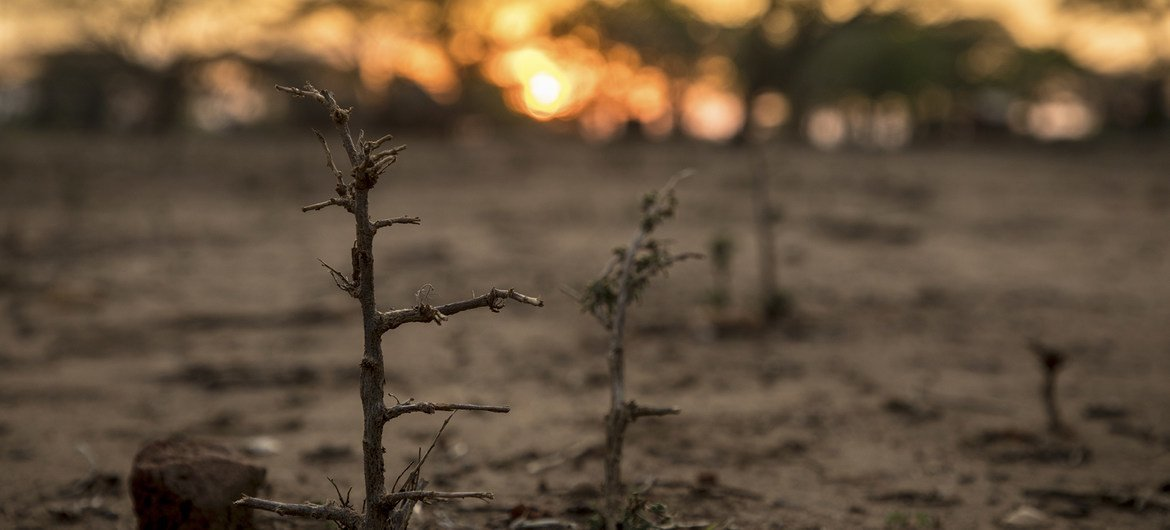

In [15]:
# Your answer here
Image(f"{outcome_folder}/{file_name}")

11\. Get the body text of the article, which starts with '*The UN Framework Convention*' and ends with '*it’s crucial now.”*'. Replace all unnecessary characters '\xa0' and new lines '\n' in the body text with spaces (' ').

In [16]:
# Your answer here
soup.find("div", {"class": "clearfix text-formatted field field--name-field-text-column field--type-text-long field--label-hidden field__item"}).text.replace("\n", " ").replace("\t", " ").replace("\xa0", " ").strip()


'The UN Framework Convention on Climate Change (UNFCCC)’s Initial NDC Synthesis Report measures the progress of national climate action plans, known as Nationally Determined Contributions or NDCs, ahead of the 26th session of Conference of its Parties (COP26) this November in Glasgow.  It found that even with increased efforts by some countries, the combined impact falls far short of what is needed.  “Today’s interim report from the UNFCCC is a red alert for our planet. It shows governments are nowhere close to the level of ambition needed to limit climate change to 1.5 degrees and meet the goals of the Paris Agreement”, Secretary-General António Guterres said on the report’s findings.  2021, a ‘make or break’ year  He said 2021 is a “make or break year” to confront the global climate emergency.   “The science is clear, to limit global temperature rise to 1.5 degrees Celsius, we must cut global emission by 45 per cent by 2030, from 2010 levels”, he stressed.  The Secretary-General call

12\. On the right hand side of the webpage, there is a section entitled '*RELATED STORIES*'. Now, you want to extract the three titles in the section. Find the div element with the value of its class being '*views-element-container block block-views block-views-block-content-related-block-related-stories*'.  

*** Think about why we are trying to find this particular div element among others.

In [17]:
# Your answer here
soup.find("div", {"class": "views-element-container block block-views block-views-block-content-related-block-related-stories"})



<div class="views-element-container block block-views block-views-block-content-related-block-related-stories" id="block-views-block-content-related-block-related-stories">
<h2 class="block-title block__title">
      Related Stories
    </h2>
<div class="content block__content">
<div><div class="view view-content-related view-id-content_related view-display-id-block_related_stories js-view-dom-id-c2506539ea342356fb372469ea559f87cda515634a2bf8486a7a56b5b571fa04">
<div class="view-content">
<div class="views-row"><div class="views-field views-field-field-news-story-photo"><span class="field-content"><a href="/en/story/2019/12/1053521"><img alt="A woman carries seafood on the shore in Senegal, one of the few countries to develop a national climate change adaptation plan specifically for fisheries." height="100" loading="lazy" src="https://global.unitednations.entermediadb.net/assets/mediadb/services/module/asset/downloads/preset/Libraries/Production+Library/13-12-2019_UNDP_Senegal.jpg/ima

13\. Examining the HTML code inside the section element above, you should see each of the three titles are defined in an h3 element. Get the list of those three h3 elements.  

In [18]:
# Your answer here
h3_list = soup.find("div", {"class": "views-element-container block block-views block-views-block-content-related-block-related-stories"}).find_all("h3", {"class": "field-content"})
h3_list

[<h3 class="field-content">
 <a href="/en/story/2019/12/1053521" hreflang="en">As COP25 goes into the night, Guterres calls for more climate ambition</a></h3>,
 <h3 class="field-content">
 <a href="/en/story/2019/12/1053561" hreflang="en">An important opportunity lost as COP25 ends in compromise, but Guterres declares 'we must not give up'</a></h3>,
 <h3 class="field-content">
 <a href="/en/story/2020/06/1067032" hreflang="en">What will power the post-pandemic global economic recovery?</a></h3>]

14\. Iterating over the list, print the title text, separated by a new line. It looks as follows:

As COP25 goes into the night, Guterres calls for more climate ambition

An important opportunity lost as COP25 ends in compromise, but Guterres declares 'we must not give up'

What will power the post-pandemic global economic recovery?

In [19]:
# Your answer here
for element in h3_list:
  print(element.text.strip())

As COP25 goes into the night, Guterres calls for more climate ambition
An important opportunity lost as COP25 ends in compromise, but Guterres declares 'we must not give up'
What will power the post-pandemic global economic recovery?
